<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [85]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dossier = 'C:/Users/pierr/OneDrive/Documents/Projet/Projet_python/dvf_ensae_sbra/'

In [86]:
mutation = gpd.read_file("C:/Users/pierr/OneDrive/Documents/paris_muta_filo/paris_mutation_filo_service.shp")

In [87]:
def to_date_col(df, col= "datemut", formated= "%Y-%m-%d"):
    return pd.to_datetime(df[col], format= "%Y-%m-%d")

# paris_mutation["datemut"]= pd.to_datetime(paris_mutation["datemut"], format= "%Y-%m-%d")
mutation["datemut"]= to_date_col(mutation)

In [88]:
mutation["year"]= mutation["datemut"].apply(lambda x: x.year)

<AxesSubplot:xlabel='year', ylabel='valeurfonc'>

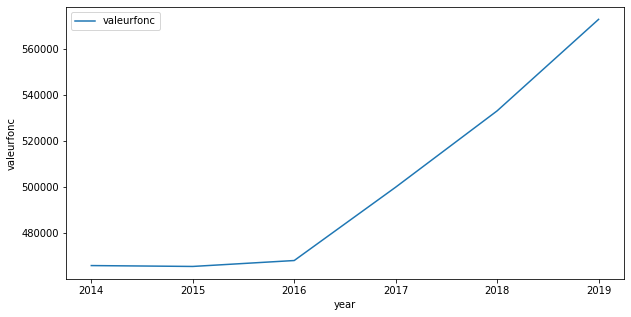

In [84]:
mutation1= mutation.copy()
mutation1= mutation1.groupby(["year"], as_index= False).mean()

fig = plt.subplots(1, 1, figsize= (10, 5))

sns.lineplot(data = mutation2, x = "year", y = "valeurfonc", label= "valeurfonc")

Nous allons faire l'approximation que la valeur foncière est linéaire par rapport à l'année de la mutation entre 2014 et 2016 ainsi qu'entre 2016 et 2019. Nous faisons également l'hypothèse que la variation de la valeur foncière par rapport à l'année est uniquement dû à l'inflation du prix de l'immobilier à Paris. Nous allons dans ce cadre réactualiser toutes les valeurs foncières à l'année 2016.

Nous récupérons d'un côté les mutations ayant eu lieu après 2016 et de l'autre celles ayant eu lieu avant 2016. 

In [31]:
mutationbefore2016 = mutation[mutation["year"]<=2016]
mutationbefore2016 = mutationbefore2016.dropna()
mutationafter2016 = mutation[mutation["year"]>=2016]
mutationafter2016 = mutationafter2016.dropna()

Nous faisons une régression de la valeur de la mutation sur l'année à laquelle elle a été faite dans les deux bases de données

In [9]:
from sklearn.linear_model import LinearRegression

In [59]:
Y1 = mutationbefore2016["valeurfonc"]
X1 = np.asarray(mutationbefore2016["year"]).reshape(-1,1)
Y2 = mutationafter2016["valeurfonc"]
X2 = np.asarray(mutationafter2016["year"]).reshape(-1,1)

In [60]:
ols1 = LinearRegression().fit(X1, Y1)
ols2 = LinearRegression().fit(X2, Y2)

Nous récupérons les coefficients liés à l'année

In [61]:
beta1 = ols1.coef_[0]
beta2 = ols2.coef_[0]

Nous mettons à jour la valeur de la mutation à l'aide des coefficients des régressions

In [79]:
def f(x) :
    if x["year"] in [2017, 2018, 2019] :
        return x["valeurfonc"] - (x["year"] - 2016)*beta2
    else :
        return x["valeurfonc"] - (x["year"] - 2016)*beta1

mutation["valfoncact"] = mutation.apply(f, axis = 1)

<AxesSubplot:xlabel='year', ylabel='valfoncact'>

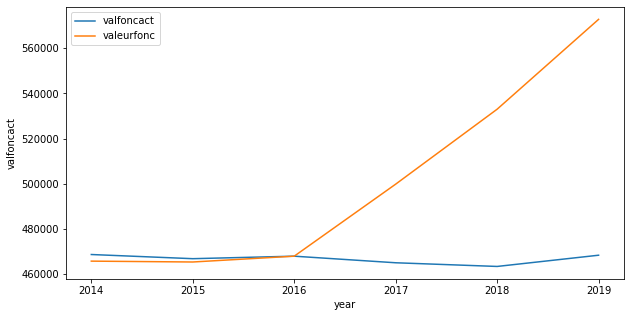

In [80]:
mutation2= mutation.copy()
mutation2= mutation2.groupby(["year"], as_index= False).mean()

fig = plt.subplots(1, 1, figsize= (10, 5))

sns.lineplot(data = mutation2, x = "year",  y = "valfoncact", label= "valfoncact")
sns.lineplot(data = mutation2, x = "year", y = "valeurfonc", label= "valeurfonc")